In [1]:
import urllib.request
from PIL import Image
  
urllib.request.urlretrieve ('https://www.tssonline.ru/hubfs/ISR/Google%20store.jpg', 'google play store')
img = Image.open ('google play store')

img.show()

# Анализ Google Play Store App Dataset

**Данные о приложения, кототорые есть в Google Play Store**

**Переменные:**
> * App - названия приложений
> * Category - категории приложений
> *  Rating - рейтинг приложений
> *  Reviews - кол-во отзывов
> *  Size - размер приложения
> *  Installs - кол-во скачиваний приложения
> *  Type - вид приложения (платное/бесплатное)
> *  Price - стоимость приложения
> *  Content Rating - возрастные ограничения приложений
> *  Genres - жанры приложений
> *  Last Updated - когда вышло последнее обновление
> *  Curent Ver - текущая версия приложения
> *  Android Ver - версия Android

> **Основной исследовательский вопрос: какие приложения и какие категории приложений Google App Store пользуются наибольшим спросом?** 

> **Здесь будут проанализированы различные взаимосвязи категорий приложений с другими переменными, влияние переменных друг на друга, а также различные аномалии.**

# Вывод из анализа 

## Таким образом, мы проанализировали наш датасет Google Play Store Apps.  
### Ответ на исследовательский вопрос был найден.   

+ **В первую очередь, на этапе преобразования были предприняты следующие шаги:**  
   1. В датасете были пропущенные значения, которые были удалены.  
   2. Также было принято решение удаления нескольких столбцов: Last Updated, Current Ver, Android Ver, так           как они не несли особой смысловой нагрузки для нашего исследования.  
   3. Более того, было принято решение дальнейшего анализа количественных переменных, которые являются               наиболее значимыми - Rating, Price, Reviews, Installs.
***

+ **Следущим шагом** были проанализированы меры центральной тенденции значений переменных по категориям, а также размах данных с помощью "Ящика с усами", данные оказались достаточно неоднородными, не исключая выбросы, особенно в переменных Installs и Reviews.
***

+ **Далее** была проанализирована Z-оценка относительно типа приложений (Paid, Free). Основной вывод заключался в том, что достаточно много приложений по разным переменным превышали z-оценку равную 3/-3, при условии, что среднеквадратичное отклонение у некоторых переменных достаточно высокое (Installs, Price), что говорит о серьезном отклонении переменных от среднего значения.
***

+ **Далее** более точечно были проанализированы выбросы. Выяснилось, что выбросы есть у переменных Installs и Reviews, но незначительные. Было принято решение не удалять выбросы из датасета, так как это помешало бы дальнейшему анализу, поскольку переменные Installs и Reviews подразумевают под собой наличие выбросов, поэтому интересно было посмотреть тенденции.
***

+ **Далее** была проанализована корреляция. Наиболее высокая была между переменными Installs и Reviews, несмотря на выбросы. Данная корреляция объяснима и логична, так как чем больше загрузок приложений, тем больше вероятность оставления отзывов.
***

+ **После** мы еще раз посмотрела на аномалии, проанализировала графики с доверительными интервалами, чтобы лучше понять переменные. Разброс большой, но в датасете и значений очень много.
***

+ **В конце** было приято решение посмотреть на переменные графически, выявить взаимосвязи и ответить на основной вопрос: а именно какие категории самые лучшие и популярные, а также выявить топ 10 приложений Google App Store: 
  1. Таким образом, мы получили, что категории с лучшим рейтингом (равным 5) - это Family, Lifestyle, Medical, Business, Tools. Самая большая категория - Family;
  2. Топ категорий с лучшими приложениями с большим количеством скачиваний: Communication, Game, Social, Productivity, Tools. Самая большая категория: Communication;
  3. Топ 10 платных приложений с высоким рейтингом в находятся в категориях Tools, Medical, Personalization, Family, Books_and_Reference;
  4. Из них Books_and_Reference, Family и Medical стоят более 2.5 долларов, а Personalization и Tools менее 1 доллара;
  5. Чаще всего у топовых приложений нет возрастных ограничений. 
  ***

 <font color = 'deeppink'> **И вот топ 10 наиболее скачиваемых, популярных и качественных приложений: Gmail, Google Chrome, Google Duo, Google Play Books, Hangouts, Messenger, UC Browser, Viber Messenger, WhatssApp, IMO:).**
             

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import scipy.special as sps
import scipy.stats
from scipy import * 
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

google = pd.read_csv('/Users/mariafomina/Downloads/googleplaystore.csv')
google

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
import missingno as msno

In [5]:
google.shape

(10841, 13)

In [6]:
google.info()
# на данном шаге важно проанализировать в каком из столбцов есть больше всего пропущенных данных 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


>**Видно, что в столбце Rating больше всего пропущенных данных. Скорее всего, это связано с тем, что у некоторых приложений нет оценок от пользователей.**

# Преобразование датасета

In [7]:
google.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price', 'Android Ver'], inplace = True)

>**С помощью данной команды мы удалили дубликаты из датасета**

In [8]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10350 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10350 non-null  object 
 1   Category        10350 non-null  object 
 2   Rating          8885 non-null   float64
 3   Reviews         10350 non-null  object 
 4   Size            10350 non-null  object 
 5   Installs        10350 non-null  object 
 6   Type            10349 non-null  object 
 7   Price           10350 non-null  object 
 8   Content Rating  10349 non-null  object 
 9   Genres          10350 non-null  object 
 10  Last Updated    10350 non-null  object 
 11  Current Ver     10342 non-null  object 
 12  Android Ver     10347 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<AxesSubplot:>

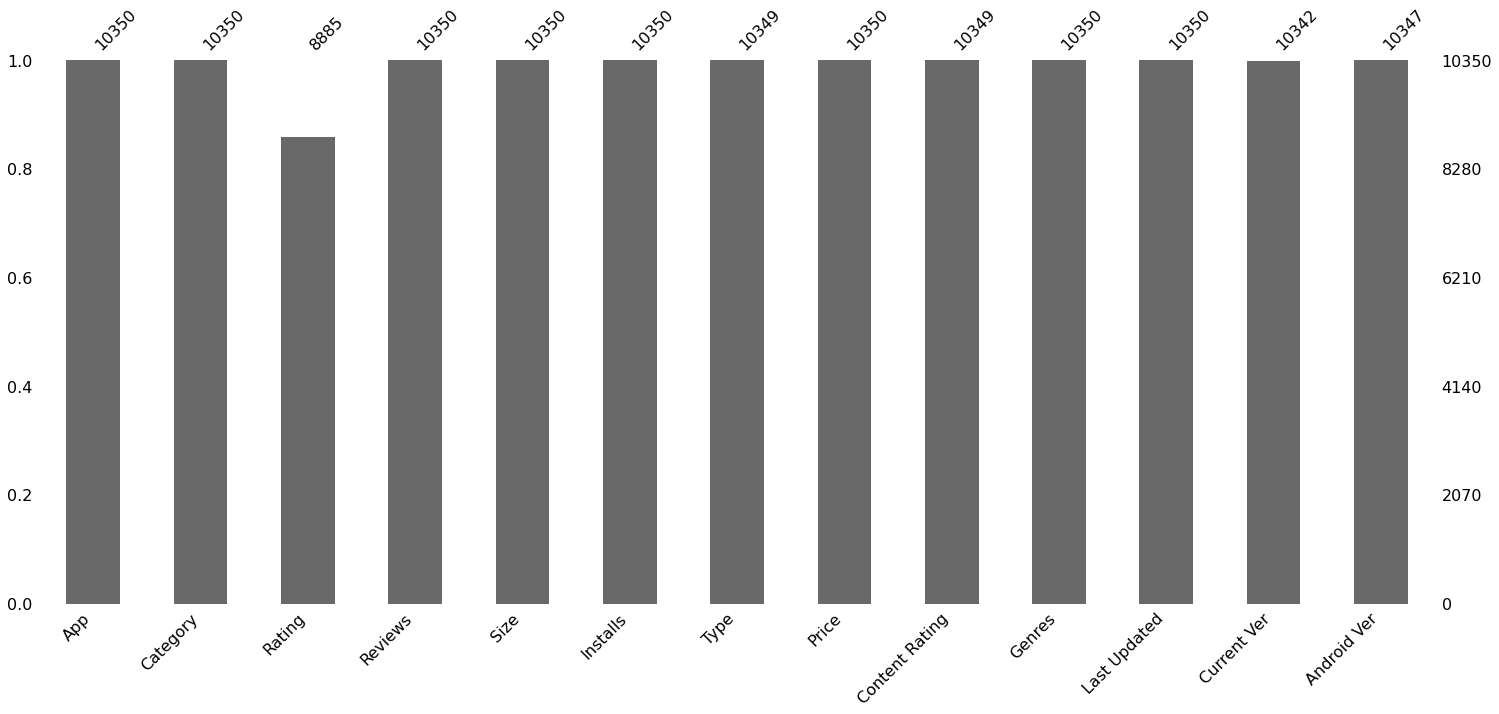

In [10]:
msno.bar(google)
# посмотрим на наличие пропущенных значений

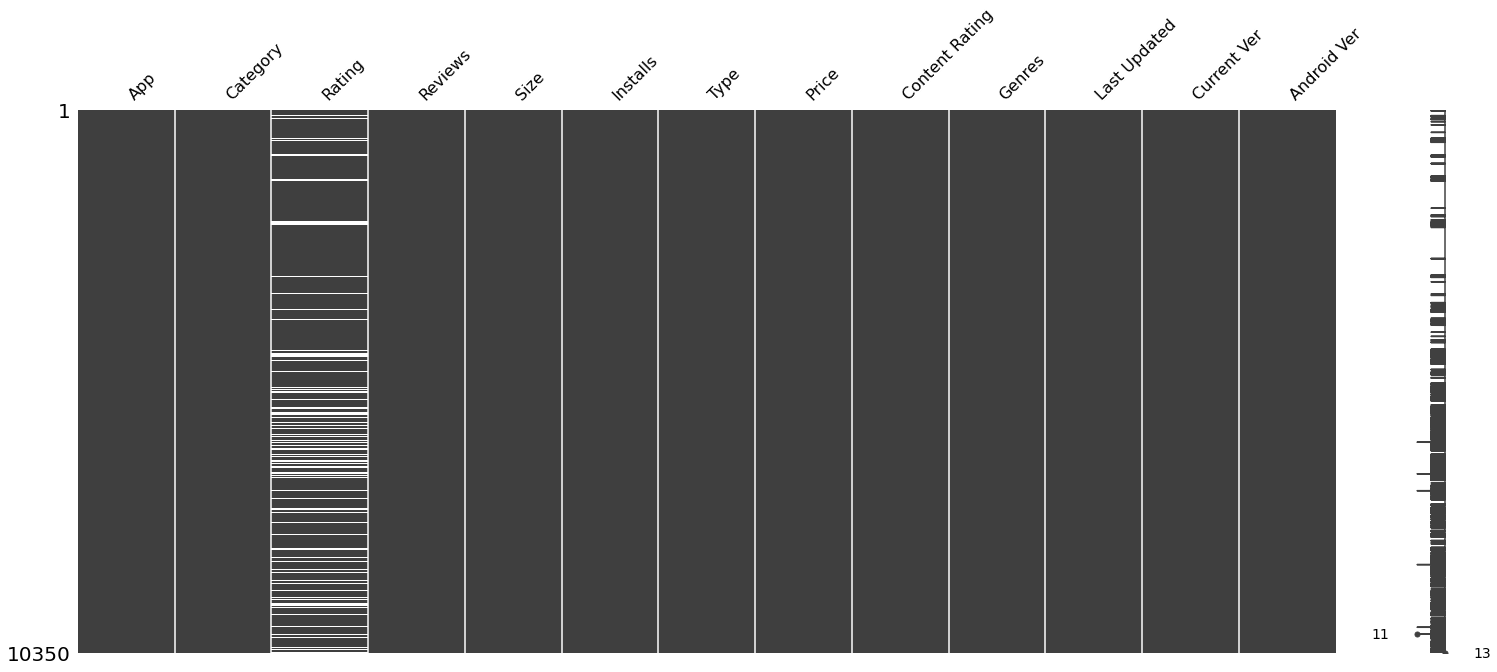

In [11]:
msno.matrix(google)

plt.show()
# аналогично посмотрим на наличие пропущенных значений, но на другой матрице

>**Начинаем делать замены переменных, чтобы изменить некоторые переменные на 'float'**

In [12]:
google.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [13]:
google.Reviews = google['Reviews'].str.replace ('3.0M', '3.0') 

In [14]:
google.Reviews = google.Reviews.astype (float) 

In [15]:
google.Installs.unique() 
# смотрим уникальные значения, чтобы понять, какие замены еще нужно сделать 

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [16]:
google.Installs = google['Installs'].str.replace ('+', '')

In [17]:
google.Installs = google['Installs'].str.replace (',', '')

In [18]:
google.Installs = google['Installs'].str.replace ('Free', '0')

In [19]:
google['Installs'] = pd.to_numeric(google['Installs'])

In [20]:
google.Size.unique() 

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [21]:
google.Size = google['Size'].str.replace('M', '')

In [22]:
google.Size = google['Size'].str.replace('Varies with device', '-1')

In [23]:
google.Size = google['Size'].str.replace('+', '')

In [24]:
google.Size = google['Size'].str.replace('1,000', '1000')

In [25]:
google ['Size'] = google ['Size'].apply(lambda x: str(round((float(x.rstrip('k'))/1024),1) )if x[-1] == 'k' else x)

In [26]:
google.Size = google.Size.astype (float) 

In [27]:
google.Price.unique() 

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [28]:
google.Price = google['Price'].str.replace('$', '')

In [29]:
google.Price = google['Price'].str.replace('Everyone', '0')

In [30]:
google.Price = google.Price.astype (float) 

In [31]:
google.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [32]:
google.head()
# теперь посмотрим наш датасет после преобразования переменных

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [33]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10350 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10350 non-null  object 
 1   Category        10350 non-null  object 
 2   Rating          8885 non-null   float64
 3   Reviews         10350 non-null  float64
 4   Size            10350 non-null  float64
 5   Installs        10350 non-null  int64  
 6   Type            10349 non-null  object 
 7   Price           10350 non-null  float64
 8   Content Rating  10349 non-null  object 
 9   Genres          10350 non-null  object 
 10  Last Updated    10350 non-null  object 
 11  Current Ver     10342 non-null  object 
 12  Android Ver     10347 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


**Можно увидеть, каким образом преобразовались данные, стали пригодными для статистических исследований**

In [34]:
google.isnull().any() 
# теперь важно посмотреть где у нас есть пропущенные значения и избавиться от них
# там, где True, есть пропущенные значения

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [35]:
google.isnull().sum()
# посмотрим сколько их

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [36]:
len(google.isnull().sum())

13

In [37]:
google = google.dropna()

In [38]:
google.isnull().any() 
# мы избавились от всех пропущенных значений

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

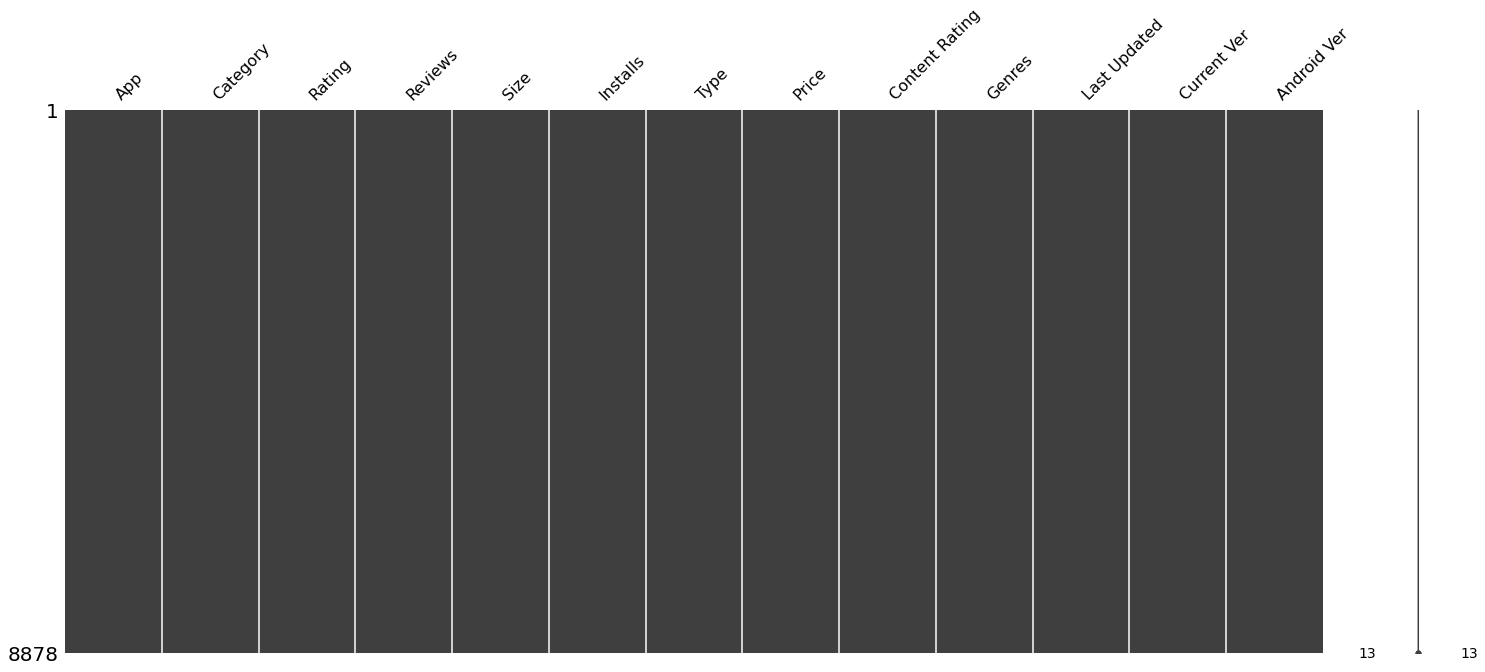

In [39]:
msno.matrix(google)

plt.show()
# посмотрим, что пропущенных значений теперь действительно нет с помощью матрицы

# Исследование качественных переменных

>**Посмотрим значения качественных переменных, чтобы понять дальнешее направление исследования**

In [40]:
google.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [41]:
google.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [42]:
categories = google['Category'].value_counts()
# присвоим переменной значение для построения графика

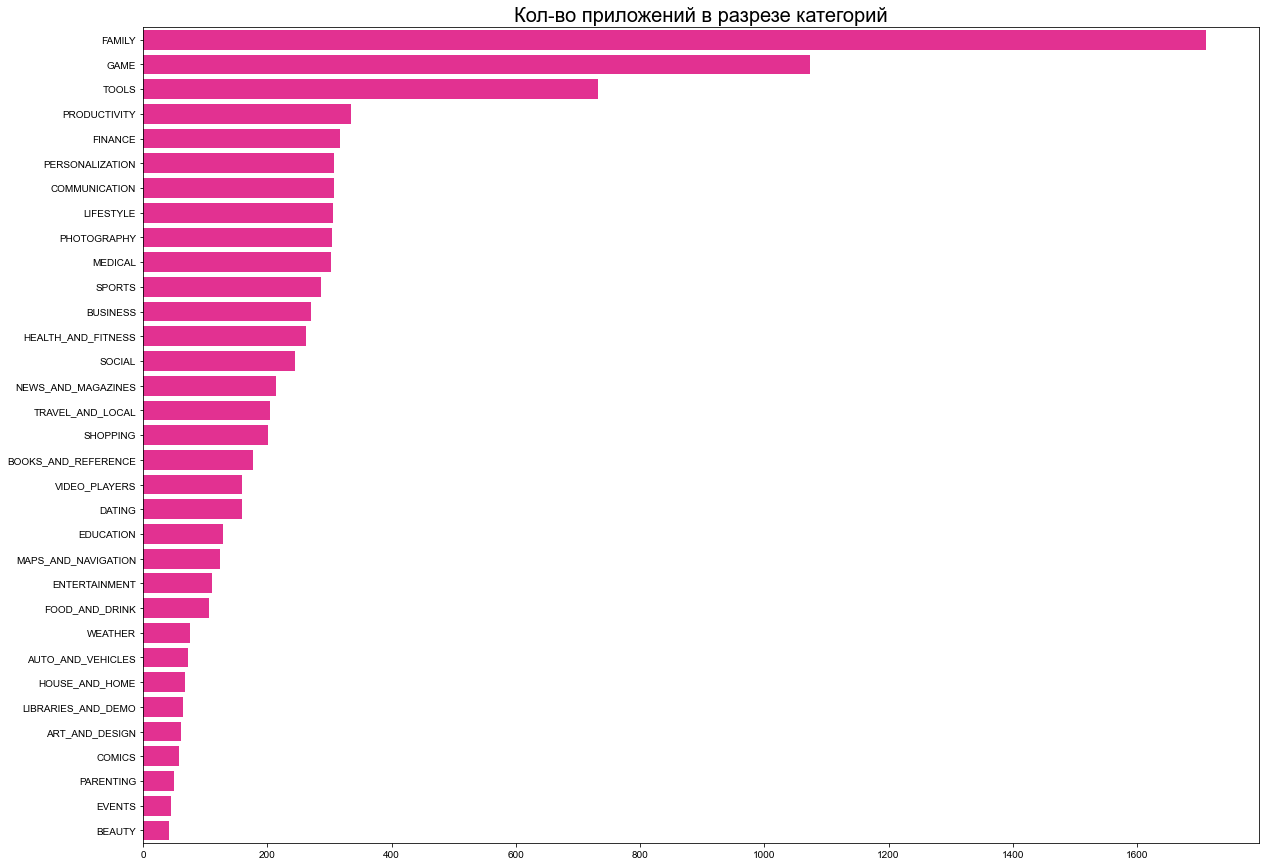

In [43]:
plt.figure(figsize = (20,15))
plt.title('Кол-во приложений в разрезе категорий', fontsize = 20)
sns.barplot(y = categories.index, x = categories.values, alpha = 1, color = 'deeppink', )
sns.set_theme (style = 'darkgrid')

plt.show()
# теперь мы видим какие категории приложений самые большие 
# это Family, Game и Tools

In [44]:
google['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [45]:
google.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [46]:
google['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [47]:
google['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [48]:
google['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

In [49]:
google = google.drop (columns = ['Android Ver', 'Last Updated', 'Current Ver'])

>**Мы посмотрели уникальные значения качественных переменных датасета. Так как столбцы Android Ver, Last Updated, Current Ver не несут важной информации, необходимой для анализа, было принято решение убрать их из таблицы и преобразовать ее**

In [50]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


# Теперь посмотрим меры центральной тенденции

In [51]:
google.describe() 
# посмотрим меры центральной тенденции переменных 

,Rating,Reviews,Size,Installs,Price
count,8878.000000,8.878000e+03,8878.000000,8.878000e+03,8878.000000
mean,4.187745,4.729619e+05,18.831009,1.649903e+07,0.963719
std,0.522572,2.906987e+06,23.163784,8.643798e+07,16.201978
min,1.000000,1.000000e+00,-1.000000,1.000000e+00,0.000000
25%,4.000000,1.640000e+02,2.500000,1.000000e+04,0.000000
50%,4.300000,4.708000e+03,9.400000,5.000000e+05,0.000000
75%,4.500000,7.119725e+04,27.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


>**Видно, что самое большое среднеквадратичное отклонение у переменных Size, Installs, Price**

In [52]:
google.pivot_table(index = 'Category', 
                  values = ['Rating', 'Installs', 'Price', 'Reviews', 'Size'],
                  aggfunc = ['mean', 'median'])
# посмотрим средние значения и медианы переменных по категориям 

mean                                    \
                         Installs     Price    Rating       Reviews   
Category                                                              
ART_AND_DESIGN       2.036526e+06  0.097869  4.377049  2.810356e+04   
AUTO_AND_VEHICLES    7.278055e+05  0.027260  4.190411  1.594014e+04   
BEAUTY               6.408619e+05  0.000000  4.278571  9.407929e+03   
BOOKS_AND_REFERENCE  1.082651e+07  0.134915  4.347458  1.235752e+05   
BUSINESS             3.198215e+06  0.238556  4.102593  4.576928e+04   
COMICS               9.661397e+05  0.000000  4.155172  5.830940e+04   
COMMUNICATION        7.867180e+07  0.184658  4.151466  1.958544e+06   
DATING               1.298883e+06  0.144403  3.971698  3.487525e+04   
EDUCATION            4.138388e+06  0.139225  4.375969  1.795715e+05   
ENTERTAINMENT        2.212306e+07  0.071892  4.136036  4.285650e+05   
EVENTS               3.544313e+05  0.000000  4.435556  3.568667e+03   
FAMILY               5.794903e+06  1.330099  4.190123  2.291198e+05   
FINANCE              2.430008e+06  7.696751  4.127445  5.362640e+04   
FOOD_AND_DRINK       2.431866e+06  0.080000  4.164151  7.237033e+04   
GAME                 2.937045e+07  0.261043  4.281285  1.318002e+06   
HEALTH_AND_FITNESS   5.194680e+06  0.161794  4.261450  1.177293e+05   
HOUSE_AND_HOME       1.839441e+06  0.000000  4.164706  4.109399e+04   
LIBRARIES_AND_DEMO   9.544219e+05  0.000000  4.179688  1.583422e+04   
LIFESTYLE            1.753250e+06  6.429115  4.096066  4.203134e+04   
MAPS_AND_NAVIGATION  5.840867e+06  0.217339  4.051613  2.472505e+05   
MEDICAL              1.396115e+05  2.148543  4.182450  4.623930e+03   
NEWS_AND_MAGAZINES   2.520145e+07  0.018598  4.128505  1.787145e+05   
PARENTING            6.223222e+05  0.191600  4.300000  1.907218e+04   
PERSONALIZATION      6.734876e+06  0.401883  4.333117  2.441312e+05   
PHOTOGRAPHY          3.197777e+07  0.250855  4.182895  6.720308e+05   
PRODUCTIVITY         3.731458e+07  0.212335  4.201796  3.070486e+05   
SHOPPING             1.275289e+07  0.027264  4.252239  4.719531e+05   
SOCIAL               5.128624e+07  0.008115  4.254918  2.186789e+06   
SPORTS               5.344516e+06  0.325909  4.225175  2.283990e+05   
TOOLS                1.562872e+07  0.284016  4.046995  3.730136e+05   
TRAVEL_AND_LOCAL     3.103346e+07  0.182878  4.094146  2.710488e+05   
VIDEO_PLAYERS        3.888686e+07  0.065375  4.063750  6.898731e+05   
WEATHER              5.681287e+06  0.392400  4.244000  1.947293e+05   

                                 median                               
                          Size Installs Price Rating  Reviews   Size  
Category                                                              
ART_AND_DESIGN       12.254098   100000   0.0   4.40    654.0   9.20  
AUTO_AND_VEHICLES    18.453425   100000   0.0   4.30    737.0   9.00  
BEAUTY               13.547619   100000   0.0   4.30    750.5   9.10  
BOOKS_AND_REFERENCE  11.302825   100000   0.0   4.50   1435.0   5.40  
BUSINESS             11.508148    10000   0.0   4.25    213.0   6.95  
COMICS               10.960345   100000   0.0   4.40   1844.5   7.10  
COMMUNICATION         7.949186  1000000   0.0   4.30  34443.0   2.80  
DATING               15.492453   100000   0.0   4.10   1939.0  11.00  
EDUCATION            14.490698  1000000   0.0   4.40  18372.0   7.00  
ENTERTAINMENT        13.268468  5000000   0.0   4.20  44550.0   8.50  
EVENTS               12.031111    50000   0.0   4.50    399.0   6.30  
FAMILY               27.479836   100000   0.0   4.30   1894.0  19.00  
FINANCE              15.270347   100000   0.0   4.30   1054.0   8.80  
FOOD_AND_DRINK       18.383962  1000000   0.0   4.30  11224.0  16.50  
GAME                 40.165642  5000000   0.0   4.30  67475.5  37.00  
HEALTH_AND_FITNESS   17.272137   500000   0.0   4.50  12367.0   8.45  
HOUSE_AND_HOME       12.733824  1000000   0.0   4.20   6315.5   7.85  
LIBRARIES_AND_DEMO   12.050000    50000   0.0   4.20

In [53]:
def range_values(x):
    return x.max() - x.min()

google.pivot_table(index='Category', 
                  values=['Rating', 'Price', 'Installs', 'Reviews'],
                  aggfunc=['std', 'var', range_values])
# теперь посмотрим размах значений рейтинга, цены и скачиваний, а также дисперсию и среднеквадратичное отклонение

std                                     \
                         Installs      Price    Rating       Reviews   
Category                                                               
ART_AND_DESIGN       6.865011e+06   0.433898  0.328326  7.125652e+04   
AUTO_AND_VEHICLES    1.866462e+06   0.232912  0.543692  4.649462e+04   
BEAUTY               1.691597e+06   0.000000  0.362603  2.107133e+04   
BOOKS_AND_REFERENCE  7.694090e+07   0.676083  0.429861  3.993643e+05   
BUSINESS             1.279316e+07   1.570636  0.652214  1.815092e+05   
COMICS               2.132610e+06   0.000000  0.537758  1.989952e+05   
COMMUNICATION        2.230826e+08   0.763471  0.438383  7.574687e+06   
DATING               2.800956e+06   0.945425  0.621058  8.735093e+04   
EDUCATION            1.257452e+07   0.796182  0.260341  7.904778e+05   
ENTERTAINMENT        9.730632e+07   0.549930  0.321019  1.206700e+06   
EVENTS               1.052350e+06   0.000000  0.419499  7.822686e+03   
FAMILY               3.493930e+07  19.269814  0.511770  1.587224e+06   
FINANCE              1.060952e+07  54.587409  0.647026  1.612833e+05   
FOOD_AND_DRINK       3.528219e+06   0.588799  0.549665  1.569994e+05   
GAME                 9.188154e+07   1.282310  0.367117  3.865384e+06   
HEALTH_AND_FITNESS   3.187442e+07   0.869982  0.650613  3.708912e+05   
HOUSE_AND_HOME       3.045211e+06   0.000000  0.374471  8.975055e+04   
LIBRARIES_AND_DEMO   2.520008e+06   0.000000  0.381384  4.990122e+04   
LIFESTYLE            6.891410e+06  48.102442  0.701960  2.036105e+05   
MAPS_AND_NAVIGATION  1.854933e+07   1.421677  0.519926  1.100913e+06   
MEDICAL              4.714079e+05   7.046156  0.682571  1.671873e+04   
NEWS_AND_MAGAZINES   1.347779e+08   0.215003  0.557308  1.134231e+06   
PARENTING            1.561834e+06   0.949035  0.517845  9.334090e+04   
PERSONALIZATION      2.039557e+07   1.065694  0.354966  9.892627e+05   
PHOTOGRAPHY          1.165241e+08   1.473032  0.469713  1.700484e+06   
PRODUCTIVITY         1.272530e+08   1.036063  0.514472  7.785104e+05   
SHOPPING             2.692831e+07   0.273777  0.432212  1.360121e+06   
SOCIAL               1.817083e+08   0.089446  0.424575  1.032314e+07   
SPORTS               1.444663e+07   1.986656  0.446895  1.090935e+06   
TOOLS                7.756940e+07   1.193660  0.616933  2.269627e+06   
TRAVEL_AND_LOCAL     1.547624e+08   1.046699  0.518260  1.163683e+06   
VIDEO_PLAYERS        1.508625e+08   0.516133  0.551098  3.076586e+06   
WEATHER              1.241301e+07   1.331086  0.331353  5.040734e+05   

                              var                                       \
                         Installs        Price    Rating       Reviews   
Category                                                                 
ART_AND_DESIGN       4.712837e+13     0.188267  0.107798  5.077492e+09   
AUTO_AND_VEHICLES    3.483681e+12     0.054248  0.295601  2.161750e+09   
BEAUTY               2.861500e+12     0.000000  0.131481  4.440012e+08   
BOOKS_AND_REFERENCE  5.919902e+15     0.457089  0.184780  1.594918e+11   
BUSINESS             1.636649e+14     2.466898  0.425384  3.294557e+10   
COMICS               4.548027e+12     0.000000  0.289183  3.959907e+10   
COMMUNICATION        4.976584e+16     0.582888  0.192179  5.737588e+13   
DATING               7.845357e+12     0.893829  0.385713  7.630185e+09   
EDUCATION            1.581186e+14     0.633906  0.067777  6.248551e+11   
ENTERTAINMENT        9.468519e+15     0.302423  0.103053  1.456126e+12   
EVENTS               1.107441e+12     0.000000  0.175980  6.119442e+07   
FAMILY               1.220755e+15   371.325744  0.261908  2.519280e+12   
FINANCE              1.125619e+14  2979.785221  0.418643  2.601232e+10   
FOOD_AND_DRINK       1.244833e+13     0.346684  0.302131  2.464880e+10   
GAME                 8.442216e+15     1.644318  0.134775  1.494119e+13   
HEALTH_AND_FITNESS   1.015978e+15     0.756868  0.423298  1.375603e+11   
HOUSE_AND_HOME       9.273311e+

>**Наиболее интересными количественными переменными для анализа являются: Installs, Price и Rating, так как с помощью них можно проранжировать категории по рейтингу, посмотреть у каких категорий рейтинг наиболее высокий и посмотреть релевантна ли оценка, посмотрев на количество скачиваний. Далее можно будет оценить насколько пользователи готовы оставлять отзывы (переменная Reviews) и для каких категорий/с каким рейтингом.**

>**Стоит отметить, что при анализе выше мы получили оценку, что среднеквадратичное отклонение у переменных Installs, Price и Size наиболее высокое, проанализируем z-оценку первых двух, так как эти переменные мы будем использовать дальше при анализе, также рассмотрим переменные Price и Rating.**

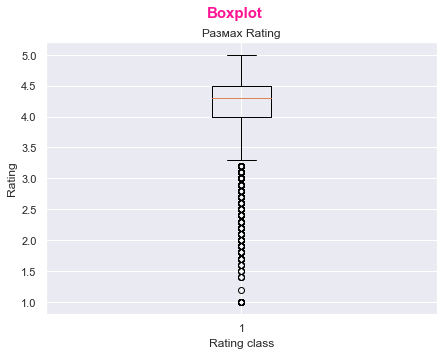

In [54]:
#построим диаграмму размаха для разных переменных

fig = plt.figure(figsize = (7,5))
fig.suptitle ('Boxplot', fontsize = 15, fontweight = 'bold', color = 'deeppink')
ax = fig.add_subplot (111)
ax.boxplot(google['Rating'])
ax.set_title('Размах Rating')
ax.set_xlabel('Rating class')
ax.set_ylabel('Rating')

plt.show()
# данные однородны, присутсвуют выбросы, размах небольшой

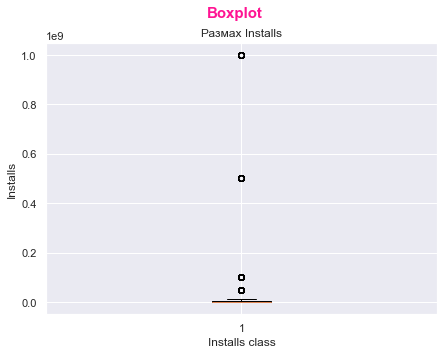

In [55]:
fig = plt.figure(figsize = (7,5))
fig.suptitle ('Boxplot', fontsize = 15, fontweight = 'bold', color = 'deeppink')
ax = fig.add_subplot (111)
ax.boxplot(google['Installs'])
ax.set_title('Размах Installs')
ax.set_xlabel('Installs class')
ax.set_ylabel('Installs')

plt.show()
# судя по диаграмме данные неоднородны

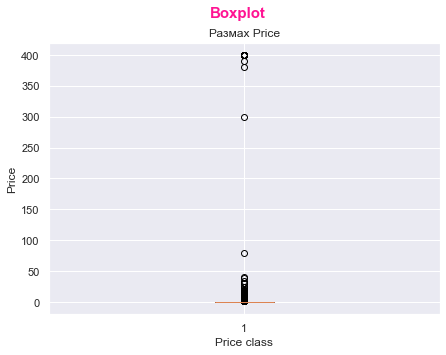

In [56]:
fig = plt.figure(figsize = (7,5))
fig.suptitle ('Boxplot', fontsize = 15, fontweight = 'bold', color = 'deeppink')
ax = fig.add_subplot (111)
ax.boxplot(google['Price'])
ax.set_title('Размах Price')
ax.set_xlabel('Price class')
ax.set_ylabel('Price')

plt.show()
# судя по диаграмме данные неоднородны, размах большой

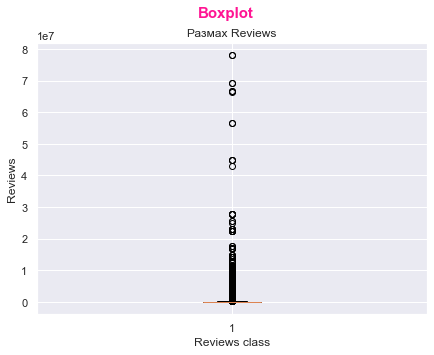

In [57]:
fig = plt.figure(figsize = (7,5))
fig.suptitle ('Boxplot', fontsize = 15, fontweight = 'bold', color = 'deeppink')
ax = fig.add_subplot (111)
ax.boxplot(google['Reviews'])
ax.set_title('Размах Reviews')
ax.set_xlabel('Reviews class')
ax.set_ylabel('Reviews')

plt.show()
# судя по диаграмме, у данной переменной больше всего выбросов, данные неоднородны, размах большой

>**С помощью диаграммы "Ящик с усами" мы смогли посмотреть размах данных, однородность и предполагаемые выбросы. Предположительно в переменных довольно много выбросов, но это мы проанализируем ниже более точечно.**

# Посмотрим на z-оценку

>**Принято решение проанализовать z-оценку переменных по типу "платные" и "бесплатные"**

In [58]:
free_app = google[google['Type'] == 'Free']
paid_app = google[google ['Type'] == 'Paid']

In [59]:
# проанализируем переменную Installs подробнее 
# посмотрим z-оценку 
scipy.stats.zscore(free_app['Installs'])

0       -0.197862
1       -0.192384
2       -0.142074
3        0.361024
4       -0.196856
           ...   
10834   -0.197968
10836   -0.197918
10837   -0.197973
10839   -0.197963
10840   -0.086174
Name: Installs, Length: 8268, dtype: float64

In [60]:
free_app['z-score'] = scipy.stats.zscore(free_app['Installs'])
free_app.head()
# посмотрим z-оценку по бесплатным приложениям

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,z-score
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,-0.197862
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,-0.192384
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,-0.142074
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,0.361024
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,-0.196856


In [61]:
paid_app['z-score'] = scipy.stats.zscore(paid_app['Installs'])
paid_app.head()
# посмотрим z-оценку по платным приложениям

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,z-score
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8,100000,Paid,4.99,Everyone,Business,-0.018554
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39.0,100000,Paid,4.99,Everyone,Business,-0.018554
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,-1.0,100000,Paid,3.99,Everyone,Communication,-0.018554
476,"Moco+ - Chat, Meet People",DATING,4.2,1545.0,-1.0,10000,Paid,3.99,Mature 17+,Dating,-0.143377
477,Calculator,DATING,2.6,57.0,6.2,1000,Paid,6.99,Everyone,Dating,-0.155859


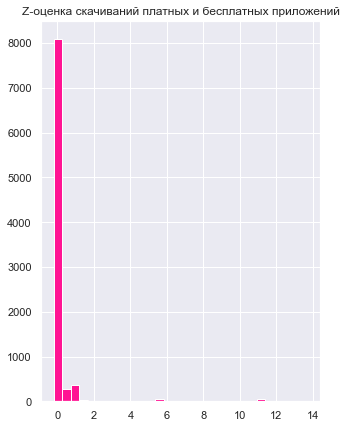

In [62]:
# для наглядности стоит построить график
google_new = pd.concat([paid_app, free_app])
google_new['z-score'].hist(figsize = (5,7), bins = 30, color = 'deeppink')
plt.title ('Z-оценка скачиваний платных и бесплатных приложений')

plt.show()

In [63]:
google_new[google_new['z-score'] > 3].head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,z-score
2241,Minecraft,FAMILY,4.5,2376564.0,-1.0,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,13.711958
4034,Hitman Sniper,GAME,4.6,408292.0,29.0,10000000,Paid,0.99,Mature 17+,Action,13.711958
4347,Minecraft,FAMILY,4.5,2375336.0,-1.0,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,13.711958
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,-1.0,1000000000,Free,0.00,Teen,Books & Reference,10.981982
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,-1.0,1000000000,Free,0.00,Everyone,Communication,10.981982


>**Видно, что у 113 приложений z-оценку выше 3, это означает, что значения больше, чем на 3 среднеквадратичных отклонения выше среднего значения. Поскольку выше мы получили, что среднеквадратичное отклонение Installs высокое среди других переменных, то разброс получается большой.**  
>**У данных приложений очень большое число скачиваний, более 1 млн, что подтверждает наш вывод.**

In [64]:
google_new.pivot_table (index = 'Category',
                  values = ['z-score'],
                  aggfunc = ['min', 'mean', 'max'])
# для наглядности посмотрим значения z-оценки по категориям 

,min,mean,max
,z-score,z-score,z-score
Category,,,
ART_AND_DESIGN,-0.197973,-0.172842,0.361024
AUTO_AND_VEHICLES,-0.197973,-0.188337,-0.086174
BEAUTY,-0.197973,-0.190809,-0.086174
BOOKS_AND_REFERENCE,-0.197974,-0.074917,10.981982
BUSINESS,-0.197974,-0.159777,0.920022
COMICS,-0.197973,-0.187173,-0.086174
COMMUNICATION,-0.197974,0.690586,10.981982
DATING,-0.197974,-0.182245,-0.086174


In [65]:
# также проанализируем переменную Price подробнее 
# посмотрим z-оценку 
# смотрим z-оценку в платных приложениях
scipy.stats.zscore(paid_app['Price'])

234     -0.149836
235     -0.149836
427     -0.166418
476     -0.166418
477     -0.116672
           ...   
10690   -0.216164
10697   -0.216164
10760   -0.100090
10782    0.049148
10785   -0.212682
Name: Price, Length: 610, dtype: float64

In [66]:
paid_app['z-score 2'] = scipy.stats.zscore(paid_app['Price'])
paid_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,z-score,z-score 2
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8,100000,Paid,4.99,Everyone,Business,-0.018554,-0.149836
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39.0,100000,Paid,4.99,Everyone,Business,-0.018554,-0.149836
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,-1.0,100000,Paid,3.99,Everyone,Communication,-0.018554,-0.166418
476,"Moco+ - Chat, Meet People",DATING,4.2,1545.0,-1.0,10000,Paid,3.99,Mature 17+,Dating,-0.143377,-0.166418
477,Calculator,DATING,2.6,57.0,6.2,1000,Paid,6.99,Everyone,Dating,-0.155859,-0.116672


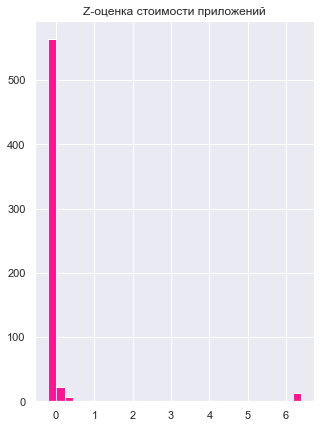

In [67]:
google_new2 = pd.concat([paid_app])
google_new2 ['z-score 2'].hist(figsize = (5,7), bins = 30, color = 'deeppink')
plt.title ('Z-оценка стоимости приложений')

plt.show()

In [68]:
google_new2[google_new2['z-score 2'] > 3]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,z-score,z-score 2
4197,most expensive app (H),FAMILY,4.3,6.0,1.5,100,Paid,399.99,Everyone,Entertainment,-0.157107,6.400045
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26.0,10000,Paid,399.99,Everyone,Lifestyle,-0.143377,6.400045
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000,Paid,400.00,Everyone,Lifestyle,-0.143377,6.400211
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8,100000,Paid,399.99,Everyone,Lifestyle,-0.018554,6.400045
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7,10000,Paid,399.99,Everyone,Entertainment,-0.143377,6.400045
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2.6,10000,Paid,299.99,Everyone,Lifestyle,-0.143377,4.741847
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.7,50000,Paid,399.99,Everyone,Finance,-0.087900,6.400045
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2.9,1000,Paid,379.99,Everyone,Lifestyle,-0.155859,6.068406
5358,I am Rich!,FINANCE,3.8,93.0,22.0,1000,Paid,399.99,Everyone,Finance,-0.155859,6.400045
5359,I am rich(premium),FINANCE,3.5,472.0,0.9,5000,Paid,399.99,Everyone,Finance,-0.150311,6.400045


>**Получилось, что всего 15 приложений z-оценку выше 3. Поскольку выше мы получили, что среднеквадратичное отклонение Price высокое среди других переменных, то разброс получается большой.**  
>**Видно, что данные приложения очень дорогие, от 399 долларов, что подтверждает наш вывод.**  
>**Видно преобладание таких категорий, как Family и Lifestyle**

In [69]:
google_new2.pivot_table (index = 'Category',
                  values = ['z-score 2'],
                  aggfunc = ['min', 'mean', 'max'])

,min,mean,max
,z-score 2,z-score 2,z-score 2
Category,,,
ART_AND_DESIGN,-0.199582,-0.199582,-0.199582
AUTO_AND_VEHICLES,-0.199582,-0.199582,-0.199582
BOOKS_AND_REFERENCE,-0.216164,-0.183083,-0.156303
BUSINESS,-0.191291,-0.113908,0.065730
COMMUNICATION,-0.216164,-0.189851,-0.149836
DATING,-0.166418,-0.137399,-0.100090
EDUCATION,-0.166418,-0.158127,-0.133254
ENTERTAINMENT,-0.183000,-0.166418,-0.149836


In [70]:
# также проанализируем переменную Reviews подробнее 
# посмотрим z-оценку 
scipy.stats.zscore(paid_app['Reviews'])

234     -0.025166
235     -0.033459
427      0.024035
476     -0.096723
477     -0.107481
           ...   
10690   -0.107857
10697   -0.107879
10760   -0.107640
10782   -0.106072
10785   -0.097735
Name: Reviews, Length: 610, dtype: float64

In [71]:
paid_app['z-score 3'] = scipy.stats.zscore(paid_app['Reviews'])
paid_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,z-score,z-score 2,z-score 3
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8,100000,Paid,4.99,Everyone,Business,-0.018554,-0.149836,-0.025166
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39.0,100000,Paid,4.99,Everyone,Business,-0.018554,-0.149836,-0.033459
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,-1.0,100000,Paid,3.99,Everyone,Communication,-0.018554,-0.166418,0.024035
476,"Moco+ - Chat, Meet People",DATING,4.2,1545.0,-1.0,10000,Paid,3.99,Mature 17+,Dating,-0.143377,-0.166418,-0.096723
477,Calculator,DATING,2.6,57.0,6.2,1000,Paid,6.99,Everyone,Dating,-0.155859,-0.116672,-0.107481


In [72]:
free_app['z-score 3'] = scipy.stats.zscore(paid_app['Reviews'])
free_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,z-score,z-score 3
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,-0.197862,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,-0.192384,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,-0.142074,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,0.361024,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,-0.196856,NaN


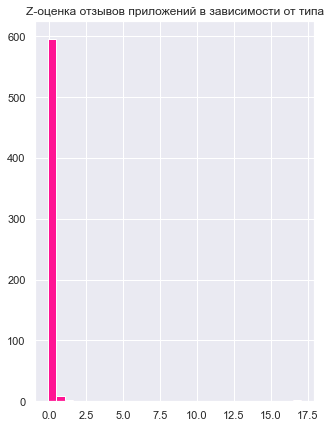

In [73]:
google_new3 = pd.concat([paid_app, free_app])
google_new3 ['z-score 3'].hist (figsize = (5,7), bins = 30, color = 'deeppink')
plt.title ('Z-оценка отзывов приложений в зависимости от типа')

plt.show()

In [74]:
google_new3[google_new3['z-score 3'] > 3]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,z-score,z-score 2,z-score 3
2241,Minecraft,FAMILY,4.5,2376564.0,-1.0,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,13.711958,-0.116672,17.075049
4347,Minecraft,FAMILY,4.5,2375336.0,-1.0,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,13.711958,-0.116672,17.066170


>**Получилось, что всего в 2-х приложениях z-оценка выше 3.**  
>**Видно, что у данных приложений очень много отзывов.**  
>**Видно преобладание такой категории, как Family.**

In [75]:
google_new3.pivot_table (index = 'Category',
                  values = ['z-score 3'],
                  aggfunc = ['min', 'mean', 'max'])

,min,mean,max
,z-score 3,z-score 3,z-score 3
Category,,,
ART_AND_DESIGN,-0.106816,-0.102673,-0.099102
AUTO_AND_VEHICLES,-0.077961,-0.077961,-0.077961
BOOKS_AND_REFERENCE,-0.107857,-0.106299,-0.098205
BUSINESS,-0.107872,-0.087711,-0.025166
COMMUNICATION,-0.107850,-0.080219,0.261640
DATING,-0.107879,-0.102200,-0.096716
EDUCATION,-0.107814,-0.045271,0.116856
ENTERTAINMENT,-0.080629,-0.071710,-0.062792


In [76]:
# также проанализируем переменную Rating подробнее 
# посмотрим z-оценку 
scipy.stats.zscore(paid_app['Rating'])

234      0.787557
235      0.966949
427     -0.468182
476     -0.109399
477     -2.979660
           ...   
10690    1.325731
10697    1.325731
10760    0.249383
10782   -0.826965
10785   -0.109399
Name: Rating, Length: 610, dtype: float64

In [77]:
paid_app['z-score 4'] = scipy.stats.zscore(paid_app['Rating'])
paid_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,z-score,z-score 2,z-score 3,z-score 4
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8,100000,Paid,4.99,Everyone,Business,-0.018554,-0.149836,-0.025166,0.787557
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39.0,100000,Paid,4.99,Everyone,Business,-0.018554,-0.149836,-0.033459,0.966949
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,-1.0,100000,Paid,3.99,Everyone,Communication,-0.018554,-0.166418,0.024035,-0.468182
476,"Moco+ - Chat, Meet People",DATING,4.2,1545.0,-1.0,10000,Paid,3.99,Mature 17+,Dating,-0.143377,-0.166418,-0.096723,-0.109399
477,Calculator,DATING,2.6,57.0,6.2,1000,Paid,6.99,Everyone,Dating,-0.155859,-0.116672,-0.107481,-2.979660


In [78]:
free_app['z-score 4'] = scipy.stats.zscore(free_app['Rating'])
free_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,z-score,z-score 3,z-score 4
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,-0.197862,NaN,-0.158512
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,-0.192384,NaN,-0.543522
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,-0.142074,NaN,0.996519
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,0.361024,NaN,0.611509
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,-0.196856,NaN,0.226499


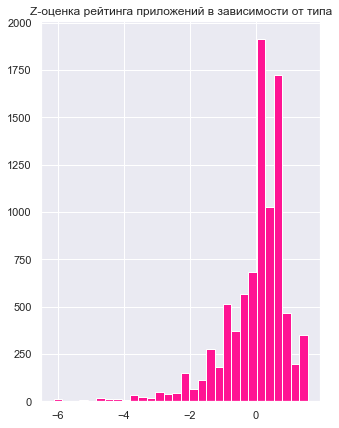

In [79]:
google_new4 = pd.concat([paid_app, free_app])
google_new4 ['z-score 4'].hist(figsize = (5,7), bins = 30, color = 'deeppink')
plt.title ('Z-оценка рейтинга приложений в зависимости от типа')

plt.show()

In [80]:
google_new4[google_new4['z-score 4'] < -3]
# мы видим, что 170 приложений имеют z-оценку больше -3
# видно, что рейтинг у них очень низкий
# видно преобладание таких категорий, как Family, Finance, Communication, Tools

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,z-score,z-score 2,z-score 3,z-score 4
2260,VeinSeek,MEDICAL,2.5,79.0,-1.0,1000,Paid,3.99,Everyone,Medical,-0.155859,-0.166418,-0.107322,-3.159052
4127,Speech Therapy: F,FAMILY,1.0,1.0,16.0,10,Paid,2.99,Everyone,Education,-0.157232,-0.183000,-0.107886,-5.849921
4161,G-Playlists,TOOLS,1.8,53.0,3.4,1000,Paid,1.49,Everyone,Tools,-0.155859,-0.207873,-0.107510,-4.414791
5914,BA Pro Financial Calculator,FINANCE,2.4,36.0,9.4,1000,Paid,1.99,Everyone,Finance,-0.155859,-0.199582,-0.107633,-3.338443
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1.0,2.0,50,Paid,1.49,Everyone,Education,-0.157177,-0.207873,-0.107886,-5.849921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,Candy simply-Fi,LIFESTYLE,2.1,2390.0,35.0,100000,Free,0.00,Everyone,Lifestyle,-0.196856,NaN,NaN,-4.008616
10562,FK Atlantas,SPORTS,1.5,2.0,26.0,5,Free,0.00,Everyone,Sports,-0.197974,NaN,NaN,-5.163647
10578,Check Lottery Tickets - Florida,FAMILY,2.0,27.0,31.0,5000,Free,0.00,Teen,Entertainment,-0.197918,NaN,NaN,-4.201121
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3.0,41.0,500,Free,0.00,Everyone,Tools,-0.197968,NaN,NaN,-6.126173


>**Получилось, что 170 приложений имеют z-оценку больше -3.**  
>**Видно, что рейтинг у данных приложений очень низкий.**  
>**Видно преобладание таких категорий, как Family, Finance, Communication, Tools.**

In [81]:
google_new4.pivot_table (index = 'Category',
                  values = ['z-score 4'],
                  aggfunc = ['min', 'mean', 'max'])

,min,mean,max
,z-score 4,z-score 4,z-score 4
Category,,,
ART_AND_DESIGN,-1.506048,0.364331,1.574035
AUTO_AND_VEHICLES,-4.008616,0.012851,1.381530
BEAUTY,-2.083564,0.185248,1.381530
BOOKS_AND_REFERENCE,-2.853585,0.310931,1.574035
BUSINESS,-6.126173,-0.157766,1.574035
COMICS,-2.661079,-0.052302,1.574035
COMMUNICATION,-6.126173,-0.068432,1.574035
DATING,-6.126173,-0.407210,1.574035


# Теперь проанализируем выбросы в переменных

In [82]:
google.Price.describe()
# сначала смотрим на значения переменной

count    8878.000000
mean        0.963719
std        16.201978
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [83]:
# далее рассмотрим интерквартильный размах
q1 = google['Price'].quantile(0.25)
q3 = google ['Price'].quantile(0.75)
iqr = q3 - q1

In [84]:
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print(iqr_outlier_threshold_bottom)
print(iqr_outlier_threshold_up)
# очевидно, что у переменной цены он будет равен 0, т.к. есть бесплатные приложения

0.0
0.0


In [85]:
google[google['Price'] < iqr_outlier_threshold_bottom].shape
# в данной переменной у нас 0 выбросов

(0, 10)

In [86]:
google.Rating.describe()

count    8878.000000
mean        4.187745
std         0.522572
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [87]:
q1 = google['Rating'].quantile(0.25)
q3 = google ['Rating'].quantile(0.75)
iqr = q3 - q1

In [88]:
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print(iqr_outlier_threshold_bottom)
print(iqr_outlier_threshold_up)

3.25
5.25


In [89]:
google[google['Rating'] > iqr_outlier_threshold_up].shape
# в данной переменной у нас 0 выбросов

(0, 10)

In [90]:
google.Installs.describe()

count    8.878000e+03
mean     1.649903e+07
std      8.643798e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [91]:
q1 = google['Installs'].quantile(0.25)
q3 = google ['Installs'].quantile(0.75)
iqr = q3 - q1

In [92]:
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print(iqr_outlier_threshold_bottom)
print(iqr_outlier_threshold_up)

-7475000.0
12485000.0


In [93]:
google[google['Installs'] > iqr_outlier_threshold_up].shape
# в данной переменной у нас есть выбросы

(750, 10)

In [94]:
google[google['Installs'] < iqr_outlier_threshold_bottom].shape

(0, 10)

In [95]:
google.Reviews.describe()

count    8.878000e+03
mean     4.729619e+05
std      2.906987e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.708000e+03
75%      7.119725e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [96]:
q1 = google['Reviews'].quantile(0.25)
q3 = google ['Reviews'].quantile(0.75)
iqr = q3 - q1

In [97]:
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print(iqr_outlier_threshold_bottom)
print(iqr_outlier_threshold_up)

-106385.875
177747.125


In [98]:
google[google['Reviews'] > iqr_outlier_threshold_up].shape
# в данной переменной у нас аналогично есть выбросы

(1554, 10)

In [99]:
google[google['Reviews'] < iqr_outlier_threshold_bottom].shape

(0, 10)

In [100]:
google[google['Reviews'] > iqr_outlier_threshold_up]['Category'].value_counts()
# мы видим, что больше всего выбросов в категориях Game, Family, Photography
# нет выбросов в таких категориях, как Beauty, Medical, Events

GAME                   422
FAMILY                 210
PHOTOGRAPHY            103
COMMUNICATION          102
TOOLS                   90
SOCIAL                  82
PRODUCTIVITY            80
SHOPPING                49
SPORTS                  45
HEALTH_AND_FITNESS      42
VIDEO_PLAYERS           39
PERSONALIZATION         38
ENTERTAINMENT           33
TRAVEL_AND_LOCAL        32
BOOKS_AND_REFERENCE     26
NEWS_AND_MAGAZINES      25
FINANCE                 24
EDUCATION               21
LIFESTYLE               14
BUSINESS                13
WEATHER                 13
DATING                  12
MAPS_AND_NAVIGATION     11
FOOD_AND_DRINK          10
ART_AND_DESIGN           5
HOUSE_AND_HOME           4
COMICS                   4
AUTO_AND_VEHICLES        3
PARENTING                1
LIBRARIES_AND_DEMO       1
Name: Category, dtype: int64

In [101]:
#посмотрим теперь меры центральной тенденции переменной с учетом выбросов
mean = google['Reviews'].mean()
std = google['Reviews'].std()
std_outlier_threshold_bottom = mean - 2.5 * std
std_outlier_threshold_up = mean + 2.5 * std
print(std_outlier_threshold_bottom)
print(std_outlier_threshold_up)

-6794506.770741548
7740430.491399353


In [102]:
#посмотрим теперь меры центральной тенденции переменной с учетом выбросов
iqr_google_no_outliers = google[google['Reviews'] <= iqr_outlier_threshold_up]
std_google_no_outliers = google[google['Reviews'] <= std_outlier_threshold_up]

In [103]:
print(google['Reviews'].mean())
print(std_google_no_outliers['Reviews'].mean())

472961.8603289029
236904.4190530519


In [104]:
print(google['Reviews'].median())
print(std_google_no_outliers['Reviews'].median())

4708.0
4355.0


In [105]:
mean = google['Installs'].mean()
std = google['Installs'].std()
std_outlier_threshold_bottom = mean - 2.5 * std
std_outlier_threshold_up = mean + 2.5 * std
print(std_outlier_threshold_bottom)
print(std_outlier_threshold_up)

-199595923.61503166
232593982.71347725


In [106]:
iqr_google_no_outliers2 = google[google['Installs'] <= iqr_outlier_threshold_up]
std_google_no_outliers2 = google[google['Installs'] <= std_outlier_threshold_up]

In [107]:
print(google['Installs'].mean())
print(std_google_no_outliers2['Installs'].mean())

16499029.549222797
7638958.067746351


In [108]:
print(google['Installs'].median())
print(std_google_no_outliers2['Installs'].median())

500000.0
500000.0


>**Удалять выбросы из датасета не стоит, так как это помешает дальнейшему анализу, поскольку переменные Installs и Reviews подразумевают под собой наличие выбросов, поэтому интересно было бы посмотреть тенденции.** 

# Посмотрим корреляцию

In [109]:
google.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068703,0.045435,0.050864,-0.022392
Reviews,0.068703,1.000000,0.064238,0.633369,-0.009554
Size,0.045435,0.064238,1.000000,-0.010554,-0.016737
Installs,0.050864,0.633369,-0.010554,1.000000,-0.011325
Price,-0.022392,-0.009554,-0.016737,-0.011325,1.000000


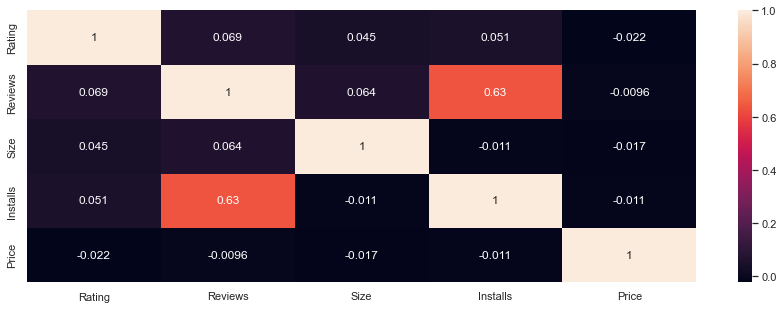

In [110]:
plt.figure (figsize = (15,5))
corr = google.corr()
sns.heatmap (corr, annot = True)
plt.show()
# на данной тепловой карте мы видим корелляцию между переменными

>**Сильная корреляция наблюдаемся между двумя переменными: Reviews и Installs. Данная корреляция объяснима и логична, так как чем больше загрузок приложений, тем больше вероятность оставления отзывов.  
Исследуем ее подробнее / посчитаем другими способами.**

In [111]:
categ_mean = google.groupby(google['Category'])['Installs'].mean()
reviews_sum = google.groupby(google['Category'])['Reviews'].sum()
# присвоили значение переменным для удобства

In [112]:
google_reviews = pd.concat([categ_mean, reviews_sum], axis = 1)
# совместили переменные

In [113]:
google_reviews['Installs'].corr(google_reviews['Reviews'])
# значение сходится с тем, что выше

0.5477945894848398

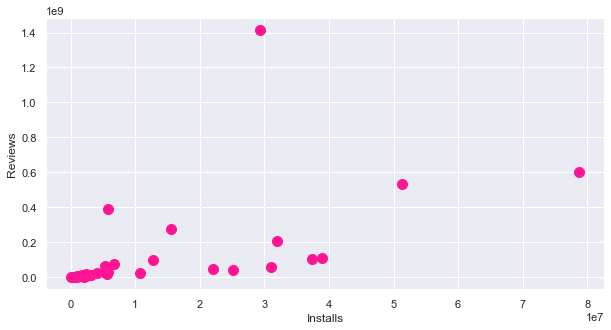

In [114]:
google_reviews.plot('Installs','Reviews', kind = 'scatter', figsize = (10,5), s = 100,
                    color = 'deeppink')

plt.show()
# посмотри диаграмму рассеяния
# по ней видно, что корелляция выше среднего (ближе к сильной)

In [115]:
corr = google_reviews.corr()
c1 = corr.abs().unstack()
c1.sort_values (ascending = False)

Installs  Installs    1.000000
Reviews   Reviews     1.000000
Installs  Reviews     0.547795
Reviews   Installs    0.547795
dtype: float64

>**Таким образом, мы увидели, что у нас есть только одна сильная взаимозависмость между переменными, но это не будет мешать нашему дальнейшему анализу.**

# Аномалии и доверительные интервалы

>**Исследуем аномалии и доверительные интервалы 4 наших переменных: Reveiws, Price, Installs, Rating.**

In [116]:
def norm_confidence(google = google, column = 'Reviews', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = google[column].mean(), scale = google[column].std())
    return interval
# задаем параметры нормального значения переменных

In [117]:
def norm_confidence2(google = google, column = 'Price', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = google[column].mean(), scale = google[column].std())
    return interval

In [118]:
def norm_confidence3(google = google, column = 'Installs', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = google[column].mean(), scale = google[column].std())
    return interval

In [119]:
def norm_confidence4(google = google, column = 'Rating', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = google[column].mean(), scale = google[column].std())
    return interval

In [120]:
confidence = norm_confidence()

In [121]:
confidence2 = norm_confidence2()

In [122]:
confidence3 = norm_confidence3()

In [123]:
confidence4 = norm_confidence4()

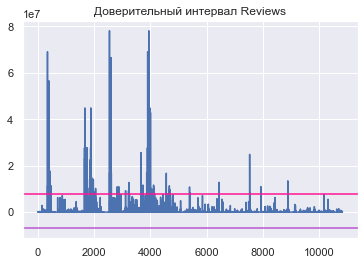

In [124]:
# построим график доверительного интервала переменных
google.Reviews.plot()
plt.axhline(y = confidence[1], color = 'deeppink', linestyle = '-')
plt.axhline(y = confidence[0], color = 'mediumorchid', linestyle = '-')
plt.title('Доверительный интервал Reviews')

plt.show()

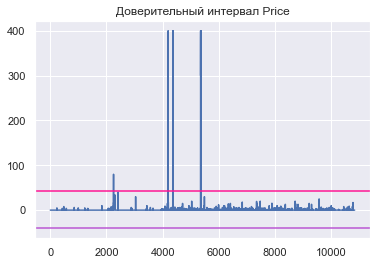

In [125]:
google.Price.plot()
plt.axhline(y = confidence2[1], color = 'deeppink', linestyle = '-')
plt.axhline(y = confidence2[0], color = 'mediumorchid', linestyle = '-')
plt.title('Доверительный интервал Price')

plt.show()

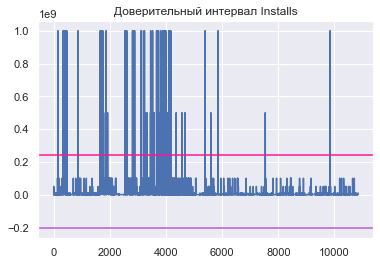

In [126]:
google.Installs.plot()
plt.axhline(y = confidence3[1], color = 'deeppink', linestyle = '-')
plt.axhline(y = confidence3[0], color = 'mediumorchid', linestyle = '-')
plt.title('Доверительный интервал Installs')

plt.show()

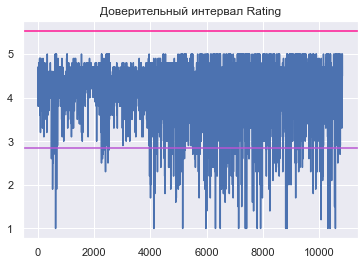

In [127]:
google.Rating.plot()
plt.axhline(y = confidence4[1], color = 'deeppink', linestyle = '-')
plt.axhline(y = confidence4[0], color = 'mediumorchid', linestyle = '-')
plt.title('Доверительный интервал Rating')

plt.show()

In [128]:
# задаем параметры аномальных значений переменных
def find_anomaly(google = google, column = 'Reviews'): 
    upper_level = google[column].mean() + 3 * google[column].std()
    lower_level = google[column].mean() - 3 * google[column].std()
    anomaly = google[(google[column] > upper_level) & (google[column] < lower_level)]
    return upper_level, lower_level, anomaly

In [129]:
def find_anomaly2(google = google, column = 'Price'): 
    upper_level = google[column].mean() + 3 * google[column].std()
    lower_level = google[column].mean() - 3 * google[column].std()
    anomaly = google[(google[column] > upper_level) & (google[column] < lower_level)]
    return upper_level, lower_level, anomaly

In [130]:
def find_anomaly3(google = google, column = 'Installs'): 
    upper_level = google[column].mean() + 3 * google[column].std()
    lower_level = google[column].mean() - 3 * google[column].std()
    anomaly = google[(google[column] > upper_level) & (google[column] < lower_level)]
    return upper_level, lower_level, anomaly

In [131]:
def find_anomaly4(google = google, column = 'Rating'): 
    upper_level = google[column].mean() + 3 * google[column].std()
    lower_level = google[column].mean() - 3 * google[column].std()
    anomaly = google[(google[column] > upper_level) & (google[column] < lower_level)]
    return upper_level, lower_level, anomaly

In [132]:
# смотрим аномальные значения по каждой переменной
anomaly = find_anomaly(google = google, column = 'Reviews')
anomaly

(9193924.217613444,
 -8248000.496955638,
 Empty DataFrame
 Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres]
 Index: [])

In [133]:
anomaly2 = find_anomaly2(google = google, column = 'Price')
anomaly2

(49.569652809535874,
 -47.64221419723582,
 Empty DataFrame
 Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres]
 Index: [])

In [134]:
anomaly3 = find_anomaly3(google = google, column = 'Installs')
anomaly3

(275812973.34632814,
 -242814914.24788257,
 Empty DataFrame
 Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres]
 Index: [])

In [135]:
anomaly4 = find_anomaly4(google = google, column = 'Rating')
anomaly4

(5.7554617060721736,
 2.6200282691474883,
 Empty DataFrame
 Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres]
 Index: [])

In [136]:
# таким образом мы выявили аномальные значения переменных
# исходя из полученных подсчетов было бы логично построить график именно переменной Rating для наглядности
upper_level = google['Rating'].mean() + 3 * google['Rating'].std()
lower_level = google['Rating'].mean() - 3 * google['Rating'].std()

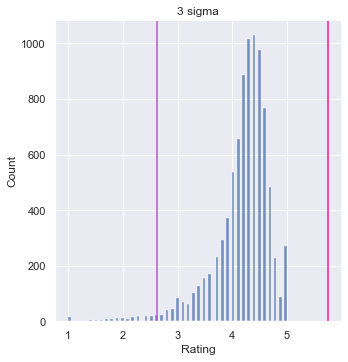

In [137]:
sns.displot (google['Rating'])
plt.axvline(x = anomaly4 [0], color = 'deeppink', linestyle = '-') 
plt.axvline(x = anomaly4 [1], color = 'mediumorchid', linestyle = '-')
plt.title('3 sigma')

plt.show()

# Теперь займемся более подробным анализом переменных и категорий

>**Здесь мы проанализируем и выявим топ категории и приложения и их взаимосвязими с различными качественными переменными.**

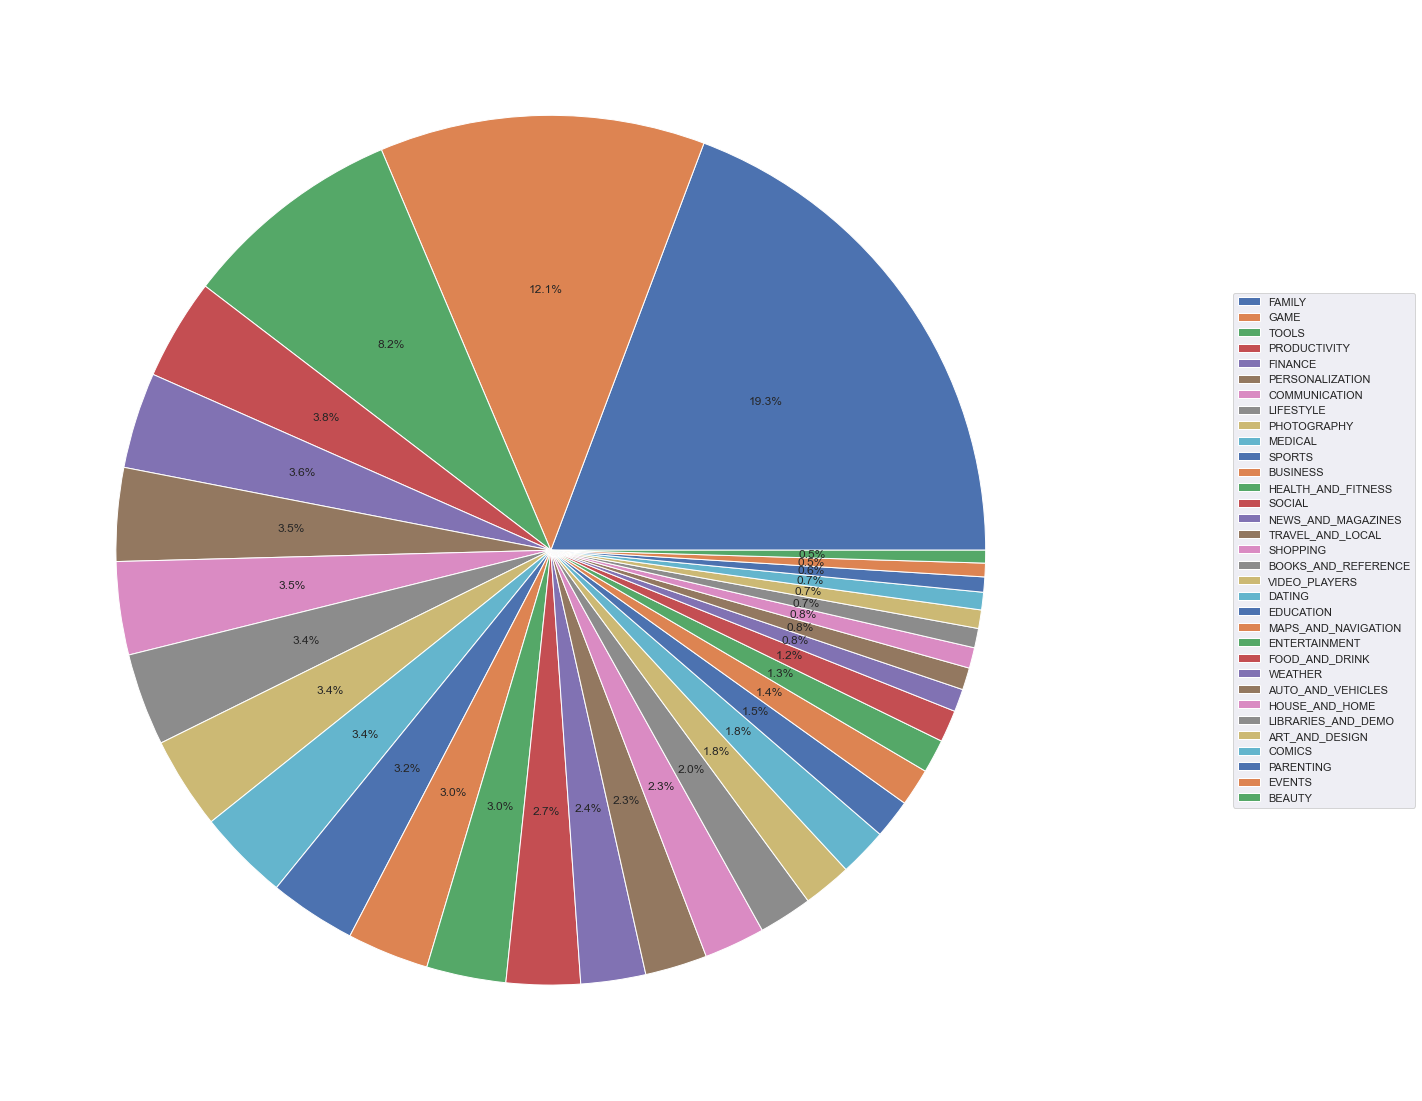

In [138]:
fig, ax = plt.subplots (figsize = (20, 20), subplot_kw = dict (aspect = 'equal'))
number_of_apps = google['Category'].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie (sizes, labeldistance = 2, autopct = '%1.1f%%')
ax.legend (labels = labels, loc = 'right', bbox_to_anchor = (0.8, 0, 0.5, 1)) 
plt.show()
# посмотрим распределение категорий в датасете

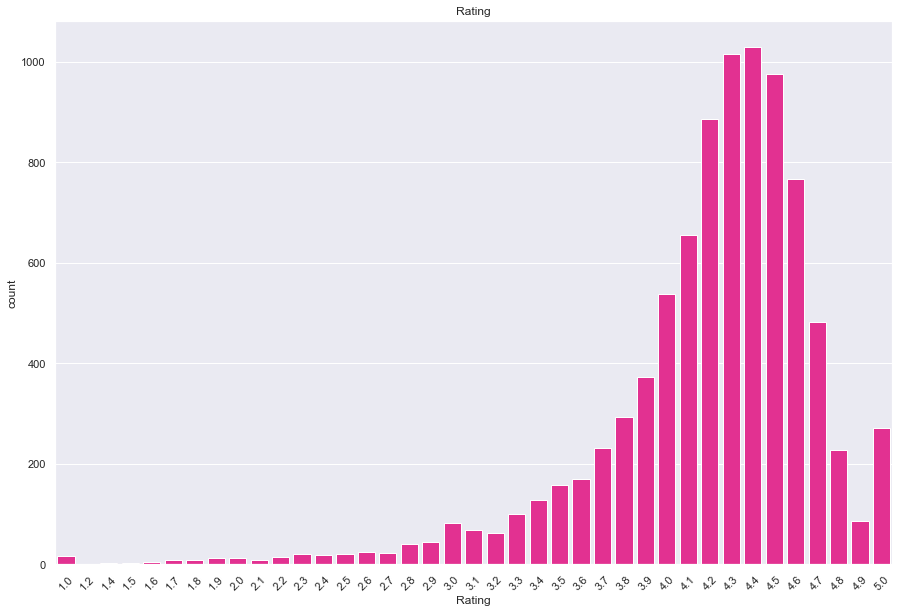

In [139]:
#визуализируем переменную Rating
plt.figure (figsize = (15,10))
sns.set_theme (style = 'darkgrid')
plt.xticks(rotation = 45)
plt.title('Rating')
ax = sns.countplot (x = 'Rating', data = google, color = 'deeppink')

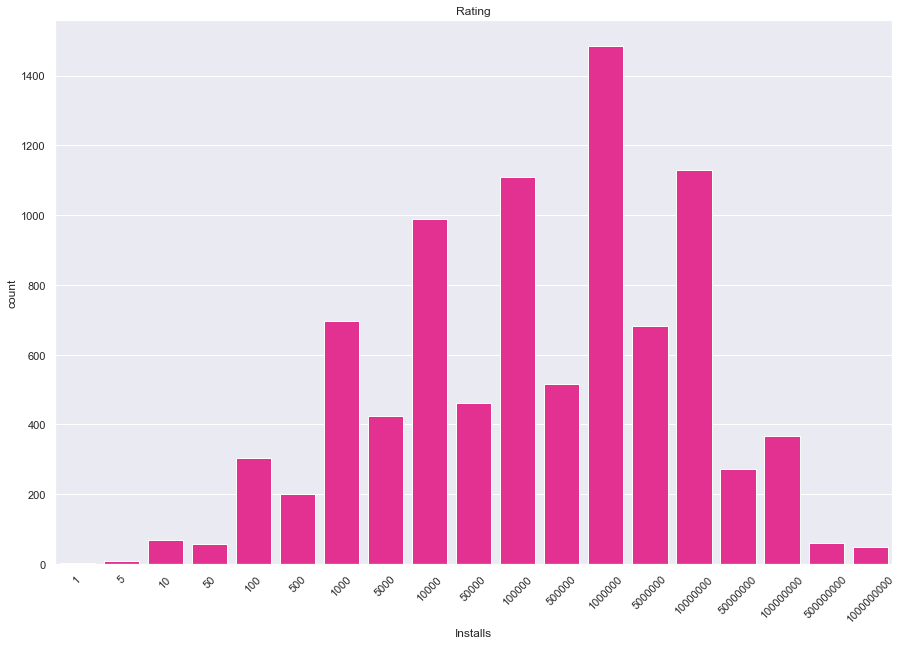

In [140]:
#визуализируем переменную Installs
plt.figure (figsize = (15,10))
sns.set_theme (style = 'darkgrid')
plt.xticks(rotation = 45)
plt.title('Rating')
ax = sns.countplot (x = 'Installs', data = google, color = 'deeppink')

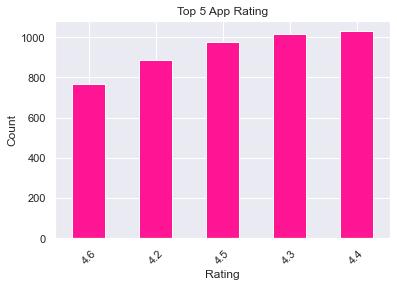

In [141]:
google ['Rating'].value_counts().nlargest(5).sort_values(ascending = True).plot.bar(color = 'deeppink')
plt.ylabel ('Count')
plt.xlabel ('Rating')
plt.title ('Top 5 App Rating')
plt.xticks (rotation = 45)

plt.show()
# посмотрим топ рейтингов приложений

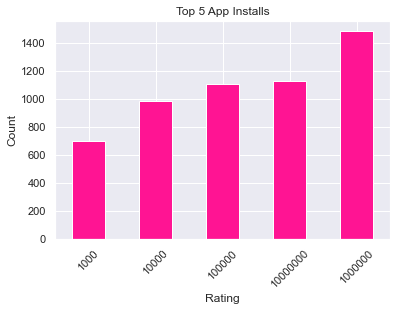

In [142]:
google ['Installs'].value_counts().nlargest(5).sort_values(ascending = True).plot.bar(color = 'deeppink')
plt.ylabel ('Count')
plt.xlabel ('Rating')
plt.title ('Top 5 App Installs')
plt.xticks (rotation = 45)

plt.show()
# посмотрим топ скачиваний приложений

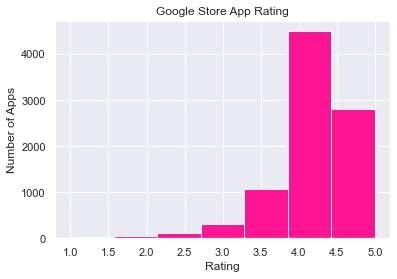

In [143]:
app_rating = google['Rating']
num_bins = 7
plt.hist (app_rating, num_bins, facecolor = 'deeppink', alpha = 1)
plt.title ('Google Store App Rating')
plt.xlabel ('Rating')
plt.ylabel ('Number of Apps')
         
plt.show ()
# теперь посмотрим у скольких приложений какой рейтинг превалирует и какой рейтинг
# видно, что от 4 

In [144]:
google_top_rat = google[google['Rating'] == 5]
# отсортируем приложения рейтинг которых равен 5

In [145]:
google_top_rat.info()
# всего таких приложений у нас 271 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 329 to 10837
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             271 non-null    object 
 1   Category        271 non-null    object 
 2   Rating          271 non-null    float64
 3   Reviews         271 non-null    float64
 4   Size            271 non-null    float64
 5   Installs        271 non-null    int64  
 6   Type            271 non-null    object 
 7   Price           271 non-null    float64
 8   Content Rating  271 non-null    object 
 9   Genres          271 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 23.3+ KB


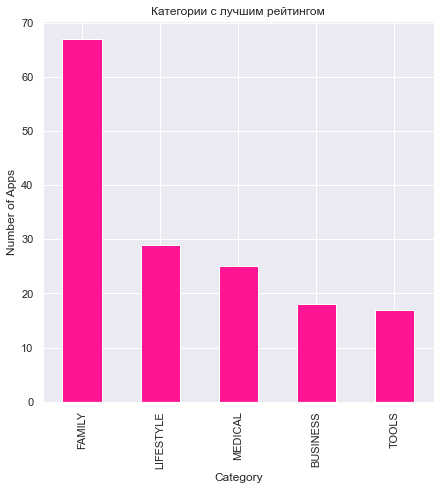

In [146]:
google_top_rat.Category.value_counts(ascending = False).nlargest(5).sort_values(ascending = False).plot.bar (color = 'deeppink', figsize = (7,7))
plt.ylabel ('Number of Apps')
plt.xlabel ('Category')
plt.title ('Категории с лучшим рейтингом')

plt.show()

>**Мы видим, что категории с лучшим рейтингом (равным 5) - это Family, Lifestyle, Medical, Business, Tools. Самая большая категория - Family.**

In [147]:
google_top_in = google[google['Installs'] > 100000000]
# теперь посмотрим топ приложений по скачиваниям

In [148]:
google_top_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 152 to 9844
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             110 non-null    object 
 1   Category        110 non-null    object 
 2   Rating          110 non-null    float64
 3   Reviews         110 non-null    float64
 4   Size            110 non-null    float64
 5   Installs        110 non-null    int64  
 6   Type            110 non-null    object 
 7   Price           110 non-null    float64
 8   Content Rating  110 non-null    object 
 9   Genres          110 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 9.5+ KB


In [149]:
google_top_rat_in = pd.concat([google_top_in, google_top_rat])
# объединим переменые в одну и получим наиболее популярные и лучшие приложения Google Store

In [150]:
google_top_rat_in.sort_values (by = ['Rating', 'Installs'], ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10.0,3.0,10000,Free,0.0,Everyone,Entertainment
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24.0,3.2,5000,Free,0.0,Everyone,Tools
8058,Oración CX,LIFESTYLE,5.0,103.0,3.8,5000,Free,0.0,Everyone,Lifestyle
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34.0,12.0,5000,Free,0.0,Everyone,Comics
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37.0,1000,Free,0.0,Everyone,Comics
...,...,...,...,...,...,...,...,...,...,...
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,-1.0,1000000000,Free,0.0,Teen,Books & Reference
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13.0,1000000000,Free,0.0,Teen,News & Magazines
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643.0,13.0,1000000000,Free,0.0,Teen,News & Magazines
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065.0,13.0,1000000000,Free,0.0,Teen,News & Magazines


In [151]:
google_top_rat_in_sorted = google_top_rat_in.pivot_table (index = 'Category',
                  values = ['Rating', 'Installs'])

In [152]:
google_top_rat_in_sorted.sort_values (by = ['Rating', 'Installs'], ascending = False)
# посмотрим значения по категориям 

,Installs,Rating
Category,,
COMICS,3.000000e+03,5.000000
LIBRARIES_AND_DEMO,1.000000e+03,5.000000
LIFESTYLE,5.351724e+02,5.000000
DATING,3.166667e+02,5.000000
EVENTS,2.183333e+02,5.000000
SHOPPING,2.050000e+02,5.000000
FINANCE,1.937500e+02,5.000000
BUSINESS,1.911111e+02,5.000000
MEDICAL,1.866400e+02,5.000000


In [153]:
google_top_rat_in['Category'].head(100).value_counts()
# топ приложений находятся в категориях ниже

COMMUNICATION          23
GAME                   19
SOCIAL                 13
PRODUCTIVITY           12
TOOLS                   9
NEWS_AND_MAGAZINES      6
TRAVEL_AND_LOCAL        5
VIDEO_PLAYERS           5
PHOTOGRAPHY             3
FAMILY                  3
BOOKS_AND_REFERENCE     1
ENTERTAINMENT           1
Name: Category, dtype: int64

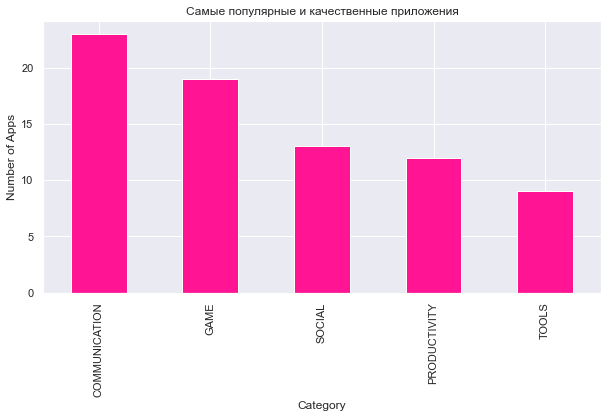

In [154]:
google_top_rat_in['Category'].head(100).value_counts().nlargest(5).sort_values(ascending = False).plot.bar(color = 'deeppink', figsize = (10,5))
plt.ylabel('Number of Apps')
plt.xlabel('Category')
plt.title('Самые популярные и качественные приложения')

plt.show()

>**Вот мы и выявили топ категорий с лучшими приложениями с большим количеством скачиваний: Communication, Game, Social, Productivity, Tools. Самая большая категория: Communication.** 

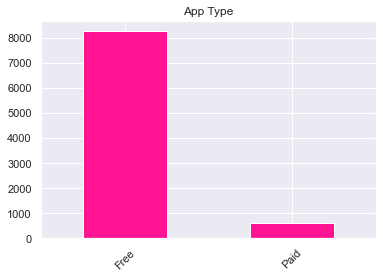

In [155]:
google['Type'].value_counts().plot (kind = 'bar', color = 'deeppink')
sns.set_theme (style = 'darkgrid')
plt.xticks (rotation = 45)
plt.title ('App Type')
plt.show ()
# теперь проанализируем категории по типу: платные и бесплатные 

In [156]:
google_top_rat_in_paid = google_top_rat_in[google_top_rat_in['Type'] == 'Paid'].head(10)
# сконцентрируемся на платных приложениях
# мы видим, что платных приложений с рейтингом = 5 мало и кол-во скачиваний у них небольшое, что логично

In [157]:
google_top_rat_in_paid.Category.sort_values (ascending = False)

3957                  TOOLS
4988                  TOOLS
4452        PERSONALIZATION
4477        PERSONALIZATION
5260        PERSONALIZATION
5263        PERSONALIZATION
2262                MEDICAL
2271                MEDICAL
5246                 FAMILY
5237    BOOKS_AND_REFERENCE
Name: Category, dtype: object

>**Топ 10 платных приложений с высоким рейтингом в находятся в категориях Tools, Medical, Personalization, Family, Books_and_Reference.**

In [158]:
google_top_rat_in_paid.Price

2262    2.99
2271    2.99
3957    1.99
4452    0.99
4477    0.99
4988    0.99
5237    3.99
5246    4.99
5260    0.99
5263    0.99
Name: Price, dtype: float64

In [159]:
# создадим категориальную переменную, чтобы сравнить цены на платные приложения в зависимости от категории
def app_price_paid (Price):
    if Price <= 1:
        return 'менее 1$'
    elif Price <= 1.5:
        return 'менее 1.5$'
    elif Price <= 2:
        return 'менее 2$'
    elif Price <= 2.5:
        return 'менее 2.5'
    elif Price > 2.5:
        return 'более 2.5$'
    else:
        return Price

In [160]:
google_top_rat_in_paid['Price'].apply(app_price_paid)

2262    более 2.5$
2271    более 2.5$
3957      менее 2$
4452      менее 1$
4477      менее 1$
4988      менее 1$
5237    более 2.5$
5246    более 2.5$
5260      менее 1$
5263      менее 1$
Name: Price, dtype: object

In [161]:
google_top_rat_in_paid['app_paid_price'] = google_top_rat_in_paid['Price'].apply(app_price_paid)

In [162]:
google_top_rat_in_paid['app_paid_price'] = pd.Categorical(google_top_rat_in_paid.app_paid_price)

In [163]:
google_top_rat_in_paid.groupby('Category')['app_paid_price'].agg(lambda x: x.value_counts().index[0])

Category
BOOKS_AND_REFERENCE    более 2.5$
FAMILY                 более 2.5$
MEDICAL                более 2.5$
PERSONALIZATION          менее 1$
TOOLS                    менее 1$
Name: app_paid_price, dtype: object

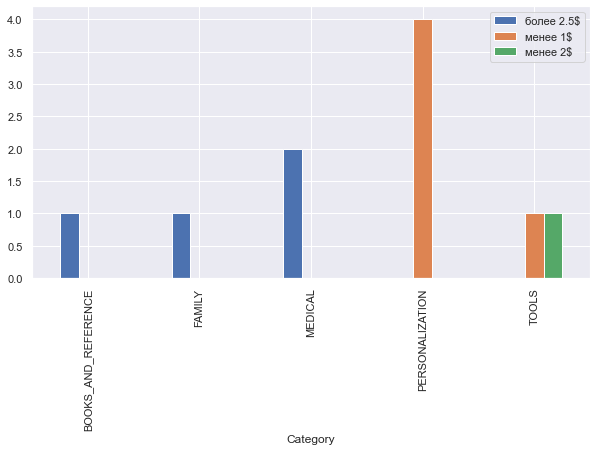

In [164]:
google_top_rat_in_paid.groupby('Category')['app_paid_price'].value_counts().unstack().plot(kind = 'bar', figsize = (10,5))

plt.show()
# на данном графике мы видим распределение цены по топ платным категориям приложений
# стоимость у них в целом небольшая, скорее всего, поэтому у них все еще большое число скачиваний

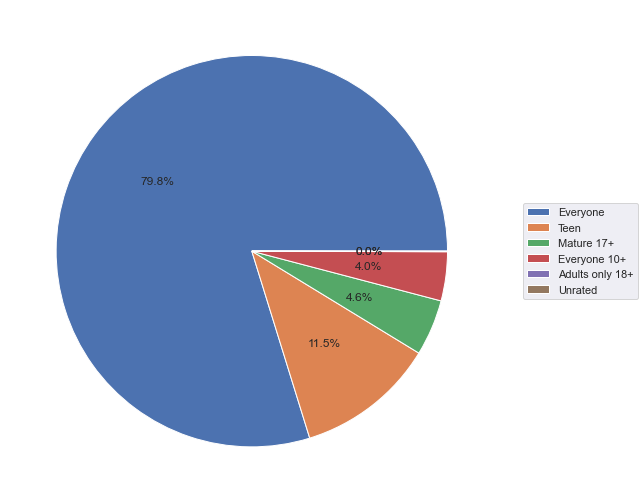

In [165]:
fig, ax = plt.subplots (figsize = (9, 9), subplot_kw = dict (aspect = 'equal'))
number_of_apps = google['Content Rating'].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie (sizes, labeldistance = 2, autopct = '%1.1f%%')
ax.legend (labels = labels, loc = 'right', bbox_to_anchor = (0.8, 0, 0.5, 1)) 

plt.show()
# теперь посмотрим распределение возрастных ограничений в датасете

In [166]:
categories2 = google_top_rat_in['Content Rating'].value_counts()

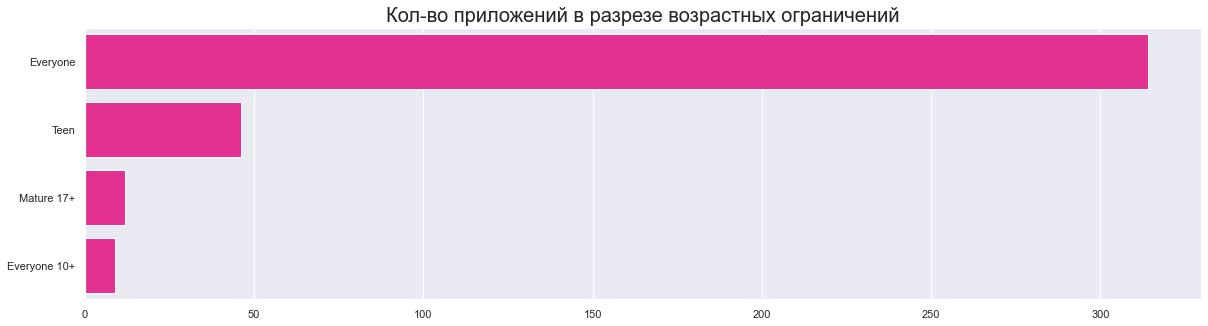

In [167]:
plt.figure(figsize = (20,5))
plt.title('Кол-во приложений в разрезе возрастных ограничений', fontsize = 20)
sns.barplot(y = categories2.index, x = categories2.values, alpha = 1, color = 'deeppink', )
sns.set_theme (style = 'darkgrid')

plt.show()

# чаще всего в топ приложениях нет возрастных ограничений, но иногда приложения бывают только для подростков

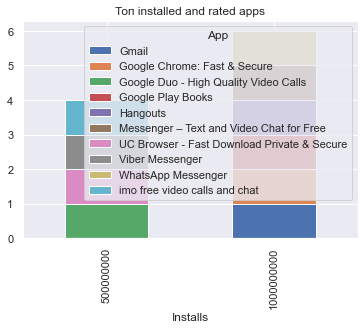

In [168]:
app = google_top_rat_in.head(10)
top_apps = app.groupby(['Installs', 'App']).size().unstack()
top_apps.plot (kind = 'bar', stacked = True)
plt.title('Топ installed and rated apps')
ax = plt.gca()

plt.show()

<font color = 'deeppink'>**Таким образом, мы выявили 10 наиболее скачиваемых, популярыных и качественных приложений: Gmail, Google Chrome, Google Duo, Google Play Books, Hangouts, Messenger, UC Browser, Viber Messenger, WhatssApp, IMO.**

# Спасибо, что дошел до конца:)

